In [9]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [10]:
# Importing data files

data_df = pd.read_csv("Resources/pollution_2006_2010.csv")

data_df.head()

,Unnamed: 0,Unnamed: 0.1,County,City,Year,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,216292,216292,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.395652,0.7,9,NaN
1,216293,216293,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.388889,0.5,6,6.0
2,216294,216294,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.395652,0.7,9,NaN
3,216295,216295,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.388889,0.5,6,6.0
4,216296,216296,Contra Costa,Concord,2006,Parts per billion,11.521739,20.0,8,19,...,Parts per billion,0.227273,2.0,5,3.0,Parts per million,0.413043,0.6,0,NaN


In [11]:
# Removing decimal and zero from 'Year' column
data_df['Year'] = data_df['Year'].astype(str).replace('\.0', '', regex=True)
data_df.head()

,Unnamed: 0,Unnamed: 0.1,County,City,Year,NO2 Units,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,216292,216292,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.395652,0.7,9,NaN
1,216293,216293,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.045455,1.0,18,1.0,Parts per million,0.388889,0.5,6,6.0
2,216294,216294,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.395652,0.7,9,NaN
3,216295,216295,Contra Costa,Concord,2006,Parts per billion,9.478261,21.0,2,20,...,Parts per billion,0.042857,0.3,20,NaN,Parts per million,0.388889,0.5,6,6.0
4,216296,216296,Contra Costa,Concord,2006,Parts per billion,11.521739,20.0,8,19,...,Parts per billion,0.227273,2.0,5,3.0,Parts per million,0.413043,0.6,0,NaN


#### Generate a summary statistics table of mean, median, variance, and
#### standard deviation for each pollutants verses county

#### Calculations for NO2 AQI:

In [12]:
# Group by County and aggregate mean, median, variance, standard deviation, and SEM of the NO2 AQI (Nitrogen dioxide Air Quality Index) for each County.
stat_no2_df = data_df.groupby(['County']).agg({'NO2 AQI': [np.max, np.min, np.mean, np.median, np.var, np.std]})
stat_no2_df.head()

NO2 AQI                                              
                amax amin       mean median         var        std
County                                                            
Alameda           52    4  22.784832     23   87.911355   9.376106
Contra Costa      65    1  17.117484     15   85.688881   9.256829
Fresno            76    5  26.733990     25  140.301565  11.844896
Humboldt          41    0   8.042975      7   24.771840   4.977132
Imperial         110    2  31.947811     32  243.199184  15.594845

In [13]:
# Rename columns for mean, median, variance, standard deviation of the NO2 AQI (Nitrogen dioxide Air Quality Index) for each County.

stat_no2_df.columns = ['Max_Value', 'Min_Value', 'Mean', 'Median', 'Variance', 'Standard_Deviation']
stat_no2_df.head()

,Max_Value,Min_Value,Mean,Median,Variance,Standard_Deviation
County,,,,,,
Alameda,52,4,22.784832,23,87.911355,9.376106
Contra Costa,65,1,17.117484,15,85.688881,9.256829
Fresno,76,5,26.733990,25,140.301565,11.844896
Humboldt,41,0,8.042975,7,24.771840,4.977132
Imperial,110,2,31.947811,32,243.199184,15.594845


In [14]:
# Resetting the Index

no2_df = stat_no2_df.reset_index()
no2_df.head()

,County,Max_Value,Min_Value,Mean,Median,Variance,Standard_Deviation
0,Alameda,52,4,22.784832,23,87.911355,9.376106
1,Contra Costa,65,1,17.117484,15,85.688881,9.256829
2,Fresno,76,5,26.733990,25,140.301565,11.844896
3,Humboldt,41,0,8.042975,7,24.771840,4.977132
4,Imperial,110,2,31.947811,32,243.199184,15.594845


#### Visual Representation:

In [15]:
# Creating dataframe for two columns for plotting

max_no2_aqi_df = no2_df[['County', 'Mean']]
max_no2_aqi_df.head()

,County,Mean
0,Alameda,22.784832
1,Contra Costa,17.117484
2,Fresno,26.733990
3,Humboldt,8.042975
4,Imperial,31.947811


#### Creating bar plot for Counties Vs. Average Nitrogen_dioxide Air Quality Index

<IPython.core.display.Javascript object>


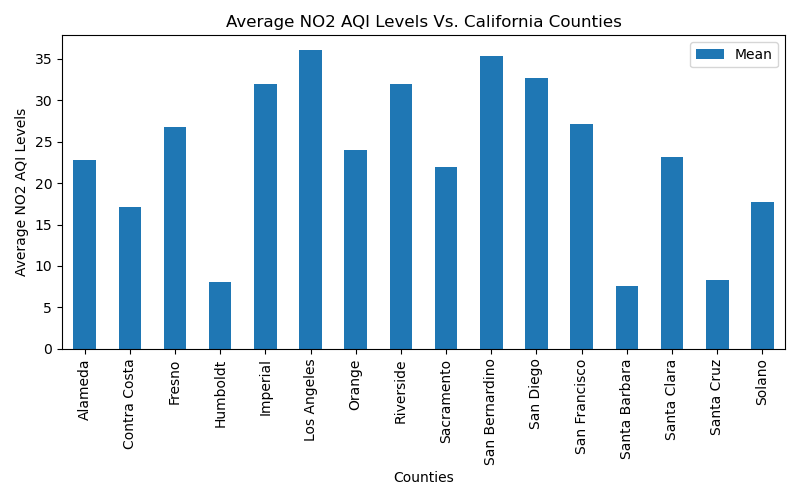

In [17]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np

# Use DataFrame.plot() in order to create a bar chart of the data
max_no2_aqi_df.plot(kind="bar", x='County', figsize=(8,5))

# Give our chart some labels and a tile
plt.title("Average NO2 AQI Levels Vs. California Counties")
plt.xlabel("Counties")
plt.ylabel("Average NO2 AQI Levels")
plt.show()
plt.tight_layout()

plt.savefig('mq_charts/counties_no2.png')

#### EPA also retained the annual average NO2 standard of 53 ppb


#### Average Nitrogen-dioxide Air Quality Index(2006-2010) Vs. Counties is calculated and and found that 'Los Angeles' county and 'San Bernardino' has the maximum 'Average  nitrogen-dioxide Air Quality Index' from (2006-2010).